# CIFAR-10 과 Keras Sequential API를 이용한 CNN 구축

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17432029186450263864
 xla_global_id: -1]

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

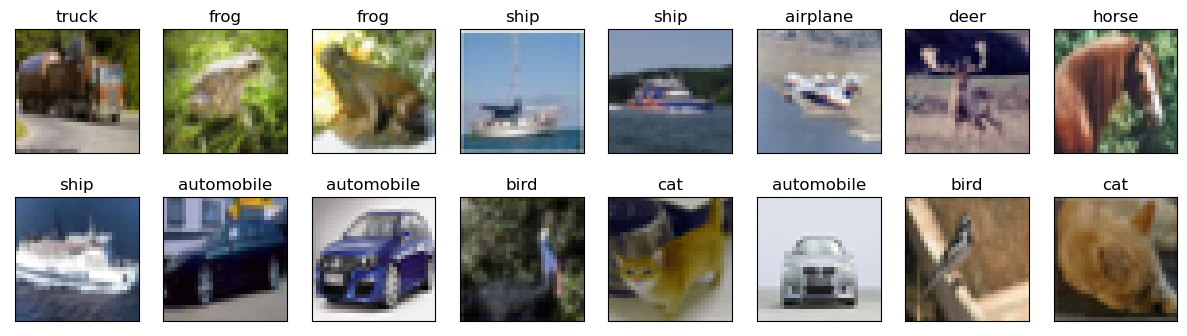

In [7]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

In [8]:
# data normalization
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

In [9]:
# one-hot encoding of class labels
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [10]:
# TensorFlow Dataset API를 사용하여 훈련 데이터를 관리하는 tf.data.Dataset 객체를 생성
# from_tensor_slices 함수는 주어진 텐서의 첫 번째 차원을 따라 슬라이스합니다.
# 이 경우, X_train_scaled와 y_train_onehot가 한 쌍을 이루는 새로운 데이터셋을 생성
# shuffle method는 데이터셋을 잘 섞어줍니다. 10000은 버퍼 크기를 의미. batch 크기눈 64.
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)

# 테스트 데이터셋에는 shuffle이 필요 없다.
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

In [11]:
# model build
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0         
                                                        

In [15]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [16]:
model.fit(train_ds, epochs=5, validation_data=test_ds, verbose=1, shuffle=True)

Epoch 1/5
782/782 [==============================] - 23s 28ms/step - loss: 1.7291 - accuracy: 0.3619 - val_loss: 1.4302 - val_accuracy: 0.4903
Epoch 2/5
782/782 [==============================] - 23s 30ms/step - loss: 1.3950 - accuracy: 0.4965 - val_loss: 1.2482 - val_accuracy: 0.5547
Epoch 3/5
782/782 [==============================] - 23s 29ms/step - loss: 1.2542 - accuracy: 0.5477 - val_loss: 1.0954 - val_accuracy: 0.6145
Epoch 4/5
782/782 [==============================] - 22s 29ms/step - loss: 1.1783 - accuracy: 0.5787 - val_loss: 1.0180 - val_accuracy: 0.6393
Epoch 5/5
782/782 [==============================] - 23s 29ms/step - loss: 1.1165 - accuracy: 0.6015 - val_loss: 0.9556 - val_accuracy: 0.6652


In [17]:
model.evaluate(test_ds, verbose=0)

[0.9555503129959106, 0.6651999950408936]

In [20]:
y_pred = model.predict(X_test_scaled).argmax(-1)
print(y_pred.shape)
print(y_pred)

313/313 [==============================] - 1s 5ms/step
(10000,)
[3 8 8 ... 5 1 7]


In [21]:
y_true = y_test.ravel()
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

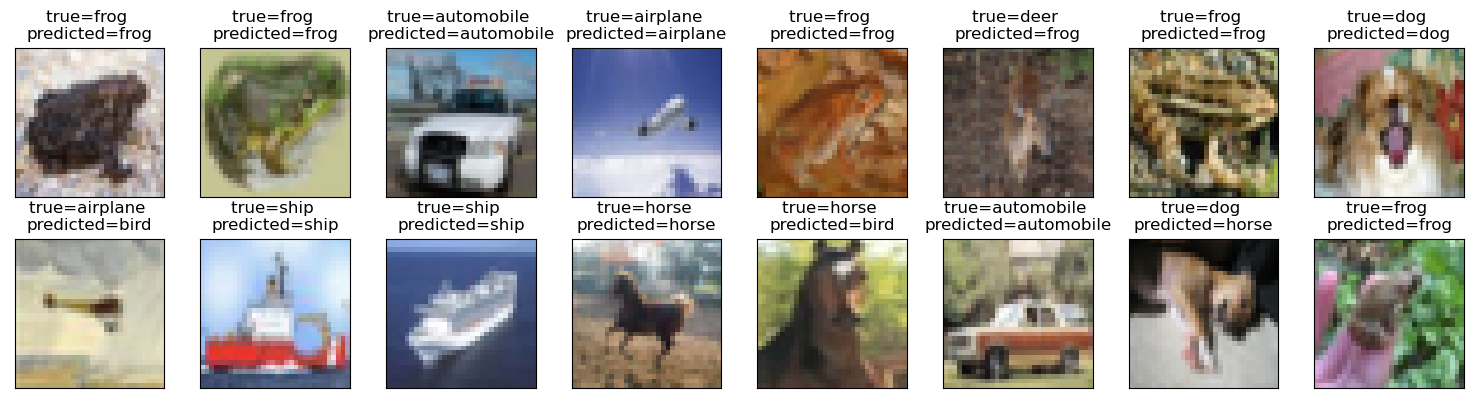

In [22]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_test))
    axes[i].imshow(X_test[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))
plt.tight_layout()

## accuracy 시각화

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

array([[669,  29,  64,  17,  23,   3,  13,   8, 137,  37],
       [ 11, 833,   5,   7,   5,   3,  11,   6,  25,  94],
       [ 64,   5, 537,  39, 145,  50,  93,  36,  20,  11],
       [ 15,  15, 111, 388, 108, 144, 128,  46,  19,  26],
       [ 15,   3,  69,  45, 663,  20,  99,  73,  13,   0],
       [ 12,   3,  91, 176,  93, 477,  58,  67,  12,  11],
       [  5,   4,  34,  47,  68,   6, 820,   7,   5,   4],
       [ 15,   3,  43,  28, 103,  48,  12, 729,   5,  14],
       [ 52,  48,  17,  20,  10,   4,  12,   4, 816,  17],
       [ 24, 137,   8,  18,   8,   7,  17,  20,  41, 720]], dtype=int64)

### heatmap 작성

Test Accuracy : 0.6652


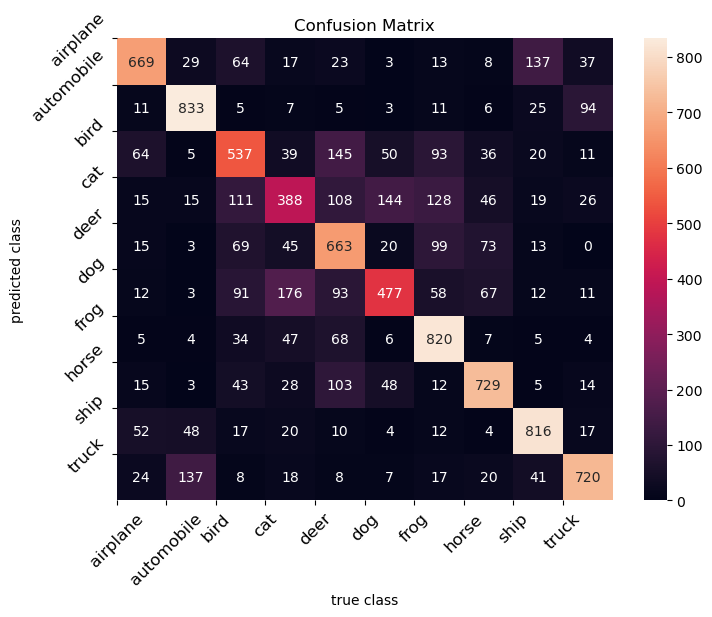

In [25]:
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d')

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))